# 03 - Exploring Visualization


PyMove also has a visualization module to perform visual analysis on the data. These views make use of libraries like Matplotlib and Folium!

**Hands-on!**

## 1. Imports


In [2]:
import pymove as pm
from pymove.visualization import folium as f, matplotlib as mpl
from pymove.utils import visual
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

## 2. Load Data

In [3]:
move_df = pm.read_csv('geolife_sample.csv')
chunk1 = move_df[move_df['id'] == 1].head(5000)
chunk5 = move_df[move_df['id'] == 5].head(5000)
move_df = chunk1.append(chunk5)
move_df.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1


In [4]:
move_df.generate_day_of_the_week_features()

move_df.generate_time_of_day_features()

move_df.generate_date_features()

move_df.generate_hour_features()

## 3. Exploring visualization module

### a. Generate colors

We have a function that allows you to generate random colors so you can have more color options in your visualizations!

In [5]:
visual.generate_color()

'#87CEFA'

Or passing intensity of each color will generate the color rgb

In [6]:
visual.rgb([0.6, 0.2, 0.2])

(51, 51, 153)

With this rbg tuple you can generate hex colors!

In [7]:
visual.hex_rgb([0.6, 0.2, 0.2])

'#333399'

### b. Exploring data over time


We can generate an overview that contains the distribution of data by time period, time, date, and day of the week to better understand how data is distributed.

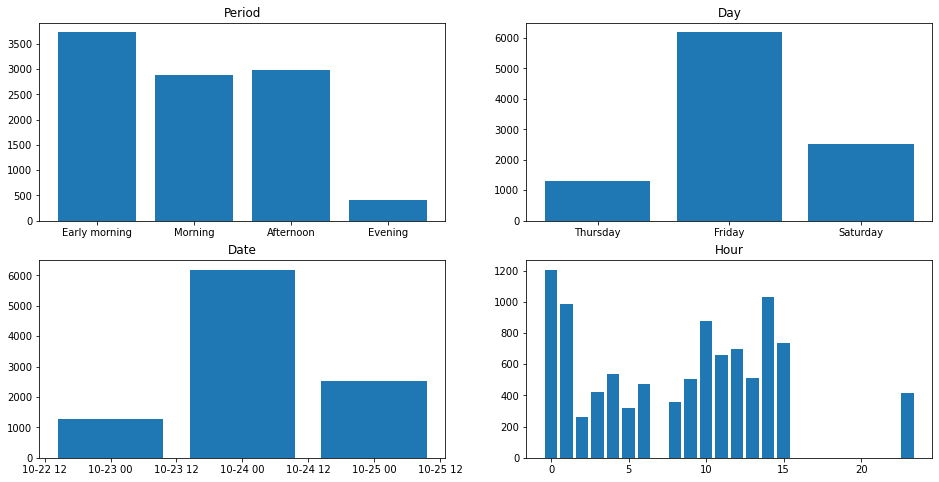

In [8]:
def count_points(column, data):
    list_df = list(move_df[column])
    return list_df.count(data)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# 01 - Graphic Periods
x_periods = list(move_df.period.unique())
y_periods = []
for data in x_periods:
    y_periods.append(count_points('period', data))

plt.subplot(2, 2, 1)
plt.bar(x_periods, y_periods)
plt.title('Period')

# 02 - Graphic Days
x_days = list(move_df.day.unique())
y_days = []
for data in x_days:
    y_days.append(count_points('day', data))

plt.subplot(2, 2, 2)
plt.bar(x_days, y_days)
plt.title('Day')

# 03 - Graphic Dates
x_dates = list(move_df.date.unique())
y_dates = []
for data in x_dates:
    y_dates.append(count_points('date', data))

plt.subplot(2, 2, 3)
plt.bar(x_dates, y_dates)
plt.title('Date')

# 04 - Graphic Hours
x_hours = list(move_df.hour.unique())
y_hours = []
for data in x_hours:
    y_hours.append(count_points('hour', data))

plt.subplot(2, 2, 4)
plt.bar(x_hours, y_hours)
plt.title('Hour')

plt.show()

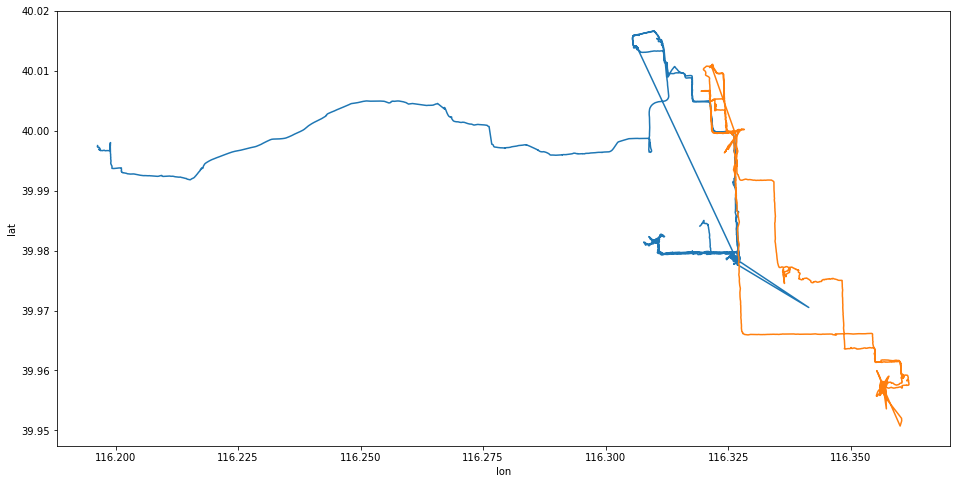

In [44]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

for id in move_df['id'].unique():
    df_ = move_df[move_df['id'] == id]
    plt.plot(df_['lon'], df_['lat'])

plt.xlabel('lon')
plt.ylabel('lat')

plt.show()

In [42]:
for id in move_df['id'].unique():
    print(id)

1
5


### c. Statistics Data

In [10]:
print('Number of points: ' + str(len(move_df)) + '\n')

print('Number of IDs: ' + str(len(move_df['id'].unique())) + '\n')

print('Start Datetime: ' + str(sorted(move_df['datetime'])[0]) +
    ' - End Datetime: ' + str(sorted(move_df['datetime'])[len(move_df)-1]) + '\n')

print('Bounding Box: (lat, lon)\n' +
    ' - Min: (' + str(round(sorted(move_df['lat'])[0], 6)) + ', ' + str(round(sorted(move_df['lon'])[0], 6)) + ')' + '\n'
    ' - Max: (' + str(round(sorted(move_df['lat'])[len(move_df)-1], 6)) + ', ' + str(round(sorted(move_df['lon'])[len(move_df)-1], 6)) + ')')

Number of points: 10000

Number of IDs: 2

Start Datetime: 2008-10-23 05:53:05 - End Datetime: 2008-10-25 14:39:24

Bounding Box: (lat, lon)
 - Min: (39.950729, 116.196292)
 - Max: (40.016703, 116.361914)


In [11]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

periods = list(move_df.period.unique())

times = sorted(list(move_df.hour.unique()))

ids = list(move_df.id.unique())

In [12]:
dropdown_days = widgets.Dropdown(description='Day:', options=days)

widgets_list = [dropdown_days]

We can generate a visualization of the trajectory points filtered by:
- **Day week**

In [13]:
dropdown_days = widgets.Dropdown(description='Day:', options=days)
display(dropdown_days)

button_day_week = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_day_week)

output_day_week = widgets.Output()
display(output_day_week)

def clicked_button_day_week(b):
    with output_day_week:
        output_day_week.clear_output()
        try:
            display(f.plot_trajectory_by_day_week(move_df, dropdown_days.value))
        except KeyError:
            print('No day found in dataframe')

button_day_week.on_click(clicked_button_day_week)

Dropdown(description='Day:', options=('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satur…

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Day Week***

In [14]:
dropdown_days_filter = widgets.Dropdown(description='Filter Day:', options=days)
display(dropdown_days_filter)

button_day_week_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_day_week_filter)

button_clean_day_week_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_day_week_filter)

output_day_week_filter = widgets.Output()
display(output_day_week_filter)

def clicked_button_day_week_filter(b):
    with output_day_week_filter:
        output_day_week_filter.clear_output()
        try:
            display(move_df.loc[move_df['day'] == dropdown_days_filter.value])
        except KeyError:
            print('No day found in dataframe')

def clicked_button_clean_day_week_filter(b):
    with output_day_week_filter:
        output_day_week_filter.clear_output()

button_day_week_filter.on_click(clicked_button_day_week_filter)
button_clean_day_week_filter.on_click(clicked_button_clean_day_week_filter)

Dropdown(description='Filter Day:', options=('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',…

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Period of day**

In [15]:
toggleButtons_periods = widgets.ToggleButtons(
    options=periods,
    description='Periods of the day:',
    disabled=False
)
display(toggleButtons_periods)

button_period_day = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_period_day)

output_period_day = widgets.Output()
display(output_period_day)

def clicked_button_period_day(b):
    with output_period_day:
        output_period_day.clear_output()
        try:
            display(f.plot_trajectory_by_period(move_df, toggleButtons_periods.value))
        except KeyError:
            print('No period found in dataframe')

button_period_day.on_click(clicked_button_period_day)


ToggleButtons(description='Periods of the day:', options=('Early morning', 'Morning', 'Afternoon', 'Evening'),…

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Period of Day***

In [16]:
toggleButtons_periods_filter = widgets.ToggleButtons(
    options=periods,
    description='Filter periods of the day:',
    disabled=False
)
display(toggleButtons_periods_filter)

button_period_day_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_period_day_filter)

button_clean_period_day_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_period_day_filter)

output_period_day_filter = widgets.Output()
display(output_period_day_filter)

def clicked_button_period_day_filter(b):
    with output_period_day_filter:
        output_period_day_filter.clear_output()
        try:
            display(move_df.loc[move_df['period'] == toggleButtons_periods_filter.value])
        except KeyError:
            print('No period found in dataframe')

def clicked_button_clean_period_day_filter(b):
    with output_period_day_filter:
        output_period_day_filter.clear_output()

button_period_day_filter.on_click(clicked_button_period_day_filter)
button_clean_period_day_filter.on_click(clicked_button_clean_period_day_filter)

ToggleButtons(description='Filter periods of the day:', options=('Early morning', 'Morning', 'Afternoon', 'Eve…

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Period of time with start date and end date**

In [17]:
datePicker_start = widgets.DatePicker(
    description='Start date:',
    disabled=False
)

datePicker_end = widgets.DatePicker(
    description='End date:',
    disabled=False
)
display(datePicker_start, datePicker_end)

button_period_date = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_period_date)

output_period_date = widgets.Output()
display(output_period_date)

def clicked_button_period_date(b):
    with output_period_date:
        output_period_date.clear_output()
        try:
            display(f.plot_trajectory_by_date(move_df, datePicker_start.value, datePicker_end.value))
        except KeyError:
            print('No date found in dataframe')

button_period_date.on_click(clicked_button_period_date)

DatePicker(value=None, description='Start date:')

DatePicker(value=None, description='End date:')

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Period of Time with Date***

In [18]:
datePicker_start_filter = widgets.DatePicker(
    description='Start date:',
    disabled=False
)

datePicker_end_filter = widgets.DatePicker(
    description='End date:',
    disabled=False
)
display(datePicker_start_filter, datePicker_end_filter)

button_period_date_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_period_date_filter)

button_clean_period_date_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_period_date_filter)

output_period_date_filter = widgets.Output()
display(output_period_date_filter)

def clicked_button_period_date_filter(b):
    with output_period_date_filter:
        output_period_date_filter.clear_output()
        try:
            display(move_df.loc[move_df['date'] == datePicker_start_filter.value])
            display(move_df.loc[move_df['date'] == datePicker_end_filter.value])
        except KeyError:
            print('No date found in dataframe')

def clicked_clean_button_period_date_filter(b):
    with output_period_date_filter:
        output_period_date_filter.clear_output()

button_period_date_filter.on_click(clicked_button_period_date_filter)
button_clean_period_date_filter.on_click(clicked_clean_button_period_date_filter)

DatePicker(value=None, description='Start date:')

DatePicker(value=None, description='End date:')

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Period of time with start and end time**

In [19]:
intRageSlider_time = widgets.IntRangeSlider(
    value=[0, 23],
    min=0,
    max=24,
    step=1,
    description='Hours (end-start):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(intRageSlider_time)

button_time = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_time)

output_period_time = widgets.Output()
display(output_period_time)

def clicked_button_time(b):
    with output_period_time:
        output_period_time.clear_output()
        try:
            display(f.plot_trajectory_by_hour(move_df, intRageSlider_time.value[0], intRageSlider_time.value[1]))
        except KeyError:
            print('No hour found in dataframe')

button_time.on_click(clicked_button_time)

IntRangeSlider(value=(0, 23), continuous_update=False, description='Hours (end-start):', max=24)

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Period of Time with Time***

In [20]:
intRageSlider_time_filter = widgets.IntRangeSlider(
    value=[0, 23],
    min=0,
    max=24,
    step=1,
    description='Filter Hours (end-start):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(intRageSlider_time_filter)

button_time_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_time_filter)

button_clean_time_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_time_filter)

output_period_time_filter = widgets.Output()
display(output_period_time_filter)

def clicked_button_time_filter(b):
    with output_period_time_filter:
        output_period_time_filter.clear_output()
        try:
            display(move_df.loc[move_df['hour'] == intRageSlider_time_filter.value[0]])
            display(move_df.loc[move_df['hour'] == intRageSlider_time_filter.value[1]])
        except KeyError:
            print('No hour found in dataframe')

def clicked_button_clean_time_filter(b):
    with output_period_time_filter:
        output_period_time_filter.clear_output()

button_time_filter.on_click(clicked_button_time_filter)
button_clean_time_filter.on_click(clicked_button_clean_time_filter)

IntRangeSlider(value=(0, 23), continuous_update=False, description='Filter Hours (end-start):', max=24)

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

### c. Exploring trajectories

- **Plot all trajectories**

In [21]:
f.plot_trajectories(move_df)

- **Plot trajectory by id**

In [22]:
intText_id = widgets.IntText(
    value=1,
    description='Id:',
    disabled=False
)
display(intText_id)

colorPicker_color = widgets.ColorPicker(
    concise=False,
    description='Color:',
    value='orange',
    disabled=False
)
display(colorPicker_color)

button_id = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_id)

output_plot_id = widgets.Output()
display(output_plot_id)


def clicked_button_id(b):
    with output_plot_id:
        output_plot_id.clear_output()
        try:
            display(f.plot_trajectory_by_id(move_df, intText_id.value, color=colorPicker_color.value))
        except IndexError:
            print('No user with id ' + str(intText_id.value) + ' in dataframe')

button_id.on_click(clicked_button_id)

IntText(value=1, description='Id:')

ColorPicker(value='orange', description='Color:')

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Trajectory by ID***

In [23]:
intText_id_filter = widgets.IntText(
    value=1,
    description='Filter Id:',
    disabled=False
)
display(intText_id_filter)

button_id_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_id_filter)

button_clean_id_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_id_filter)

output_plot_id_filter = widgets.Output()
display(output_plot_id_filter)

def clicked_button_id_filter(b):
    with output_plot_id_filter:
        output_plot_id_filter.clear_output()
        try:
            display(move_df.loc[move_df['id'] == intText_id_filter.value])
        except IndexError:
            print('No user with id ' + str(intText_id.value) + ' in dataframe')

def clicked_button_clean_id_filter(b):
    with output_plot_id_filter:
        output_plot_id_filter.clear_output()

button_id_filter.on_click(clicked_button_id_filter)
button_clean_id_filter.on_click(clicked_button_clean_id_filter)

IntText(value=1, description='Filter Id:')

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Heat map**

In [24]:
f.heatmap(move_df)

- **Heat map with time**

In [25]:
f.heatmap_with_time(move_df)

- **Plot cluster**

In [26]:
intSlider_cluster = widgets.IntSlider(
    value=1000,
    min=0,
    max=10000,
    step=1,
    description='Cluster:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(intSlider_cluster)

button_cluster = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_cluster)

output_cluster = widgets.Output()
display(output_cluster)

def clicked_button_cluster(b):
    with output_cluster:
        output_cluster.clear_output()
        display(f.cluster(move_df, intSlider_cluster.value))

button_cluster.on_click(clicked_button_cluster)

IntSlider(value=1000, continuous_update=False, description='Cluster:', max=10000)

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Cluster***

In [27]:
intSlider_cluster_filter = widgets.IntSlider(
    value=1000,
    min=0,
    max=10000,
    step=1,
    description='Filter Cluster:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(intSlider_cluster_filter)

button_cluster_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_cluster_filter)

button_clean_cluster_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_cluster_filter)

output_cluster_filter = widgets.Output()
display(output_cluster_filter)

def clicked_button_cluster_filter(b):
    with output_cluster_filter:
        output_cluster_filter.clear_output()
        display(move_df.loc[move_df['cluster'] == intSlider_cluster_filter.value])

def clicked_button_clean_cluster_filter(b):
    with output_cluster_filter:
        output_cluster_filter.clear_output()

button_cluster_filter.on_click(clicked_button_cluster_filter)
button_clean_cluster_filter.on_click(clicked_button_clean_cluster_filter)

IntSlider(value=1000, continuous_update=False, description='Filter Cluster:', max=10000)

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Faster MarkerCluster**

In [28]:
f.faster_cluster(move_df)

- **Plot stops points**

In [29]:
move_df.generate_tid_based_on_id_datetime()
move_df.generate_move_and_stop_by_radius()

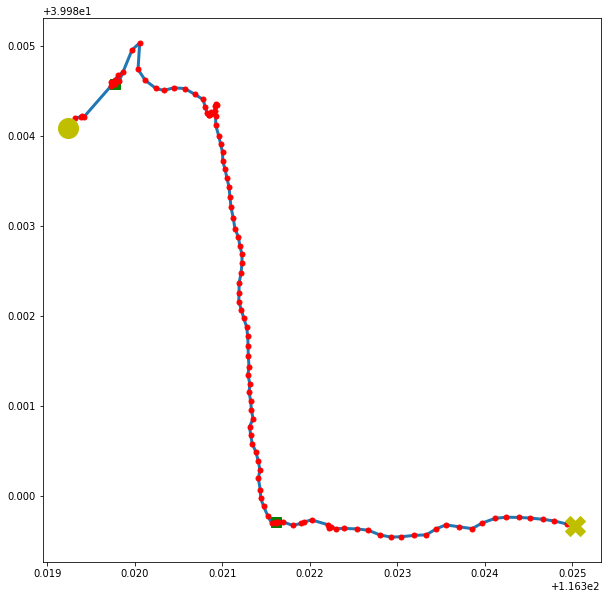

In [30]:
mpl.plot_trajectory_by_id(move_df, id_="12008102305", label='tid', feature="situation", value="stop", return_fig=False)

In [31]:
intSlider_points = widgets.IntSlider(
    value=1000,
    min=0,
    max=10000,
    step=1,
    description='Points:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(intSlider_points)

button_points = widgets.Button(
    description='Submit',
    disabled=False,
    tooltip='Click to submit'
)
display(button_points)

output_points = widgets.Output()
display(output_points)

def clicked_button_points(b):
    with output_points:
        output_points.clear_output()
        display(f.plot_stops(move_df, n_rows=intSlider_points.value))

button_points.on_click(clicked_button_points)

IntSlider(value=1000, continuous_update=False, description='Points:', max=10000)

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

***Filter Points***

In [32]:
intSlider_points_filter = widgets.IntSlider(
    value=1000,
    min=0,
    max=10000,
    step=1,
    description='Filter Points:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(intSlider_points_filter)

button_points_filter = widgets.Button(
    description='Filter',
    disabled=False,
    tooltip='Click to filter'
)
display(button_points_filter)

button_clean_points_filter = widgets.Button(
    description='Clean',
    disabled=False,
    button_style='danger',
    tooltip='Click to clean'
)
display(button_clean_points_filter)

output_points_filter = widgets.Output()
display(output_points_filter)

def clicked_button_points_filter(b):
    with output_points_filter:
        output_points_filter.clear_output()
        display(f.plot_stops(move_df, n_rows=intSlider_points.value))

def clicked_button_clean_points_filter(b):
    with output_points_filter:
        output_points_filter.clear_output()

button_points_filter.on_click(clicked_button_points_filter)
button_clean_points_filter.on_click(clicked_button_clean_points_filter)

IntSlider(value=1000, continuous_update=False, description='Filter Points:', max=10000)

Button(description='Filter', style=ButtonStyle(), tooltip='Click to filter')

Button(button_style='danger', description='Clean', style=ButtonStyle(), tooltip='Click to clean')

Output()

- **Show lat and lon GPS**

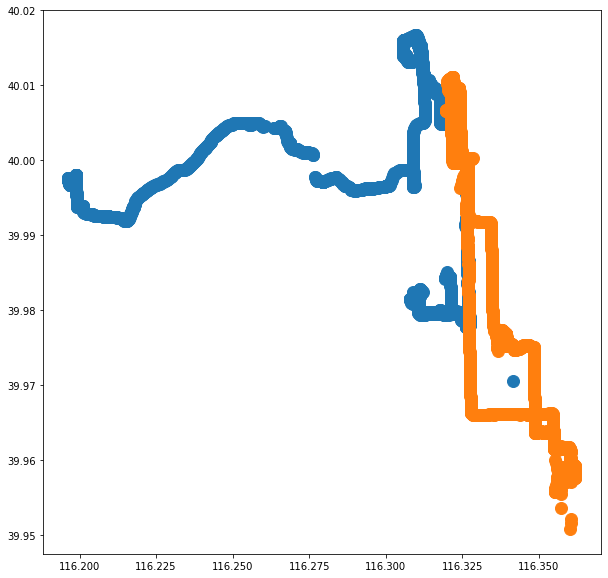

In [33]:
mpl.plot_trajectories(move_df, return_fig=False)